In [1]:
#!pip install -r requirements.txt


In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
from scipy import stats
from fredapi import Fred
from datetime import datetime


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\trait

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\trait

AttributeError: _ARRAY_API not found

In [3]:
from Analysis.utils import EDA_comparison, FredIndicatorFetcher,HistoricalDataDownloader

In [4]:
sp500_data = pd.read_excel('data/sp500_data.xlsx')
economic_indicators_data = pd.read_excel('data/economic_indicators_data.xlsx')

In [5]:
# Configurar estilos de gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [6]:
a = EDA_comparison(sp500_data = sp500_data, economic_indicators_data =economic_indicators_data)
merged_data = a.merged_data


***

In [7]:
merged_data

,^GSPC CLOSE,Daily Return,CLI,BCI,GDP,CCI
Date,,,,,,
2000-02-01,1409.280029,0.010628,101.16580,100.61020,101.5818,102.8489
2000-03-01,1379.189941,0.009346,101.08020,100.41700,101.6581,102.7685
2000-05-01,1468.250000,0.010892,100.84420,99.99604,101.7747,102.7249
2000-06-01,1448.810059,0.019858,100.69700,99.77863,101.7674,102.6267
2000-08-01,1438.099976,0.005081,100.34110,99.41608,101.6210,102.5589
...,...,...,...,...,...,...
2023-12-01,4594.629883,0.005874,99.71788,98.76071,100.5243,98.1097
2024-01-02,4742.830078,-0.005661,99.99000,99.14000,100.1272,99.1000
2024-01-03,4704.810059,-0.008016,100.11000,99.13000,100.2548,98.8300


*** 
### Otra estrategia

In [8]:
merged_data['Daily Return (Normalized)'] = 100 * (merged_data['Daily Return'] +1)

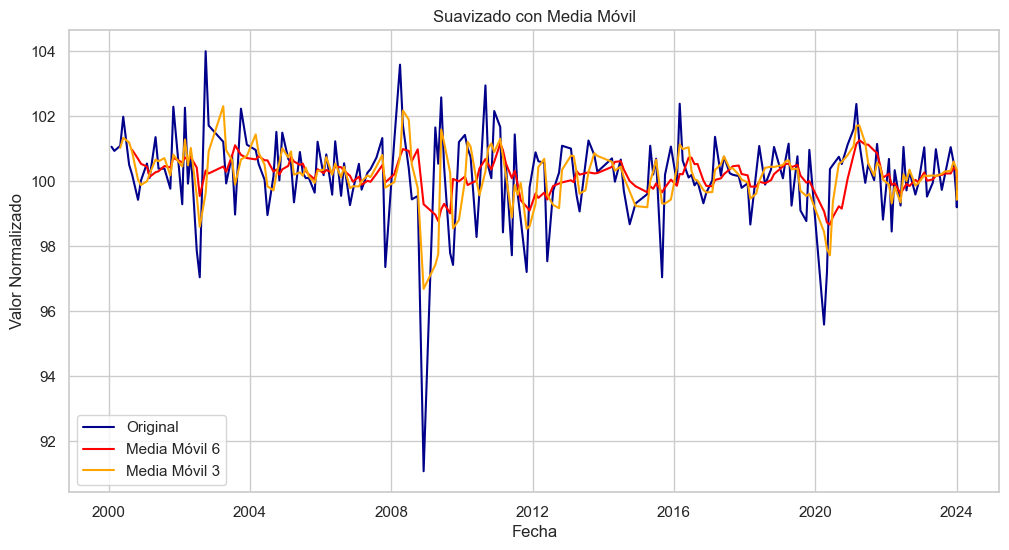

In [25]:
# Suavizado con media móvil simple
window_size = 6  # Tamaño de la ventana
merged_data['Daily Return (Smoothed MA)'] = merged_data['Daily Return (Normalized)'].rolling(window=window_size).mean()

window_size = 3  # Tamaño de la ventana
merged_data['Daily Return (Smoothed MA 3)'] = merged_data['Daily Return (Normalized)'].rolling(window=window_size).mean()


# Visualización
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['Daily Return (Normalized)'], label='Original', c='darkblue')
plt.plot(merged_data.index, merged_data['Daily Return (Smoothed MA)'], label='Media Móvil 6', color='red')
plt.plot(merged_data.index, merged_data['Daily Return (Smoothed MA 3)'], label='Media Móvil 3', color='orange')
plt.figsize=(9, 7)
plt.title('Suavizado con Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Valor Normalizado')
plt.legend()
plt.show()


***

## MM 6

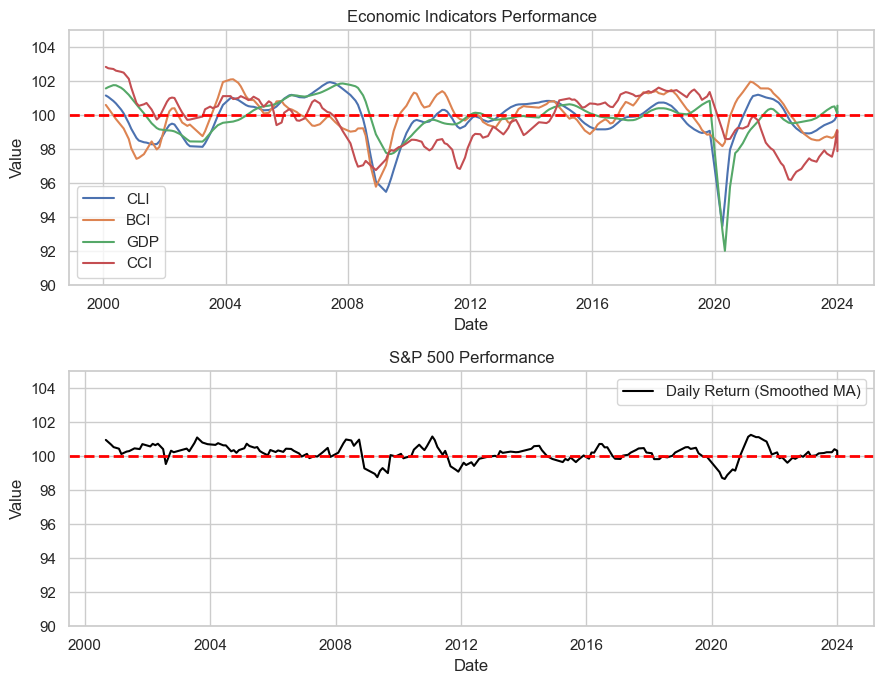

In [11]:
a.plot_performance(sp500_column='Daily Return (Smoothed MA)',indicators_columns= ['CLI','BCI','GDP','CCI'])

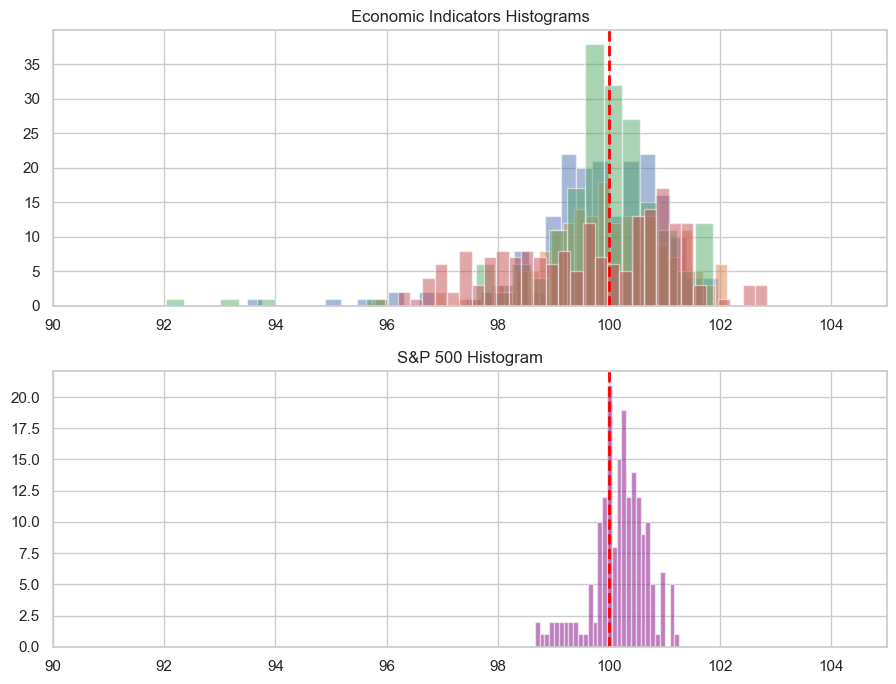

In [12]:
a.plot_histograms(sp500_column='Daily Return (Smoothed MA)', indicators_columns=['CLI','BCI','GDP','CCI'])

## MM 3

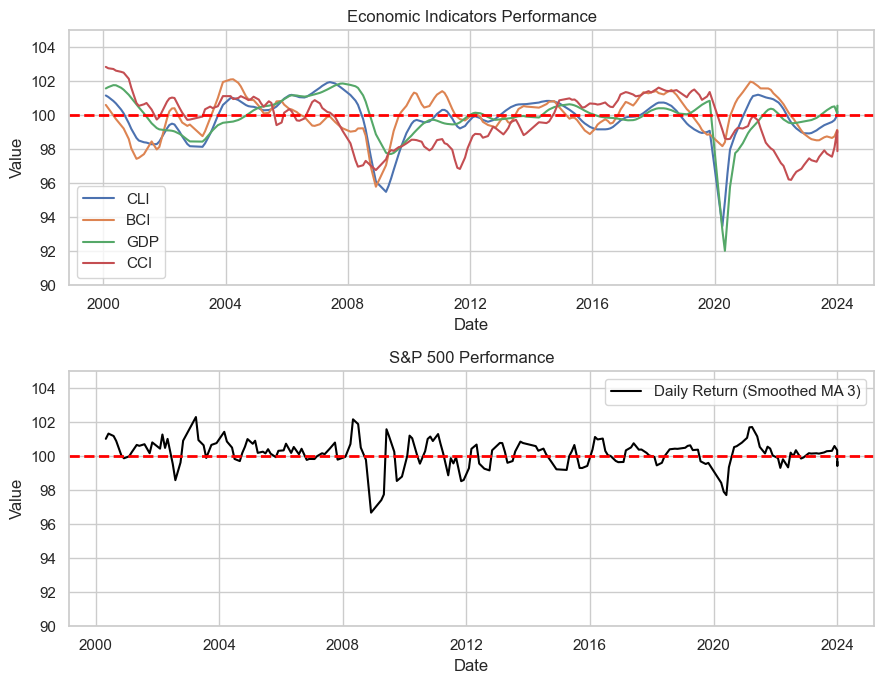

In [13]:
a.plot_performance(sp500_column='Daily Return (Smoothed MA 3)',indicators_columns= ['CLI','BCI','GDP','CCI'])

## Base 100

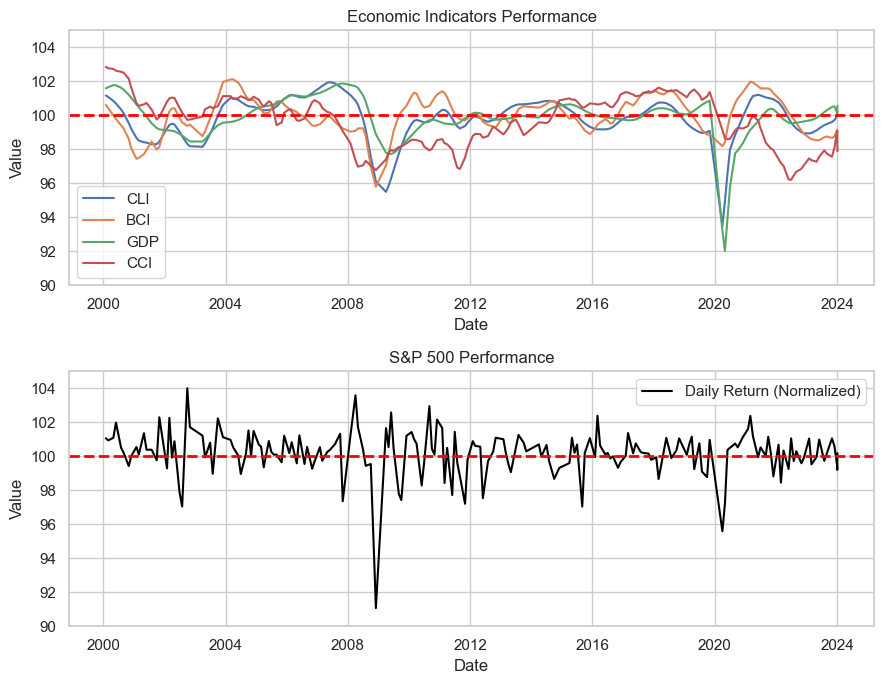

In [14]:
a.plot_performance(sp500_column='Daily Return (Normalized)',indicators_columns= ['CLI','BCI','GDP','CCI'])

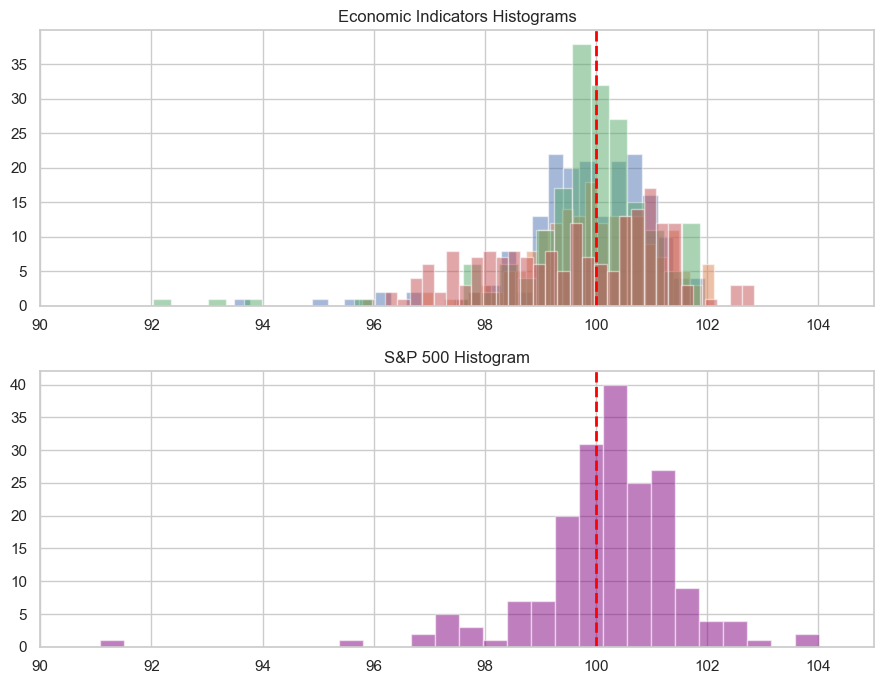

In [15]:
a.plot_histograms(sp500_column='Daily Return (Normalized)', indicators_columns=['CLI','BCI','GDP','CCI'])